<h2>Unit 12 Live Session </center> </h2>
<h4> W203 Instructional Team </h4>

#### Multivariate Linear Regression, Inference
<center>![title](hypothesis_1.jpg)</center>

#### Class Announcements
1. Announcement 1
2. Announcement 2
3. Announcement 3

#### 1.0 Useful functions in R:

Code    |    Function 
--------------------------|---------------------------------------------------------------------
coefficients(fit) | Extract model coefficients
fitted(fit)       | Extract predicted values
residuals(fit)    | Extract resduals
vcovHC(fit)       | Extract heteroskedasticity-robust covariance matrix
coeftest(fit, vcov = vcovHC) | Conduct hypothesis test with heteroskedasticity-robust standard errors
confint(fit, level=0.95)| Calculate non-robust CIs for model parameters (at 95%) 

**Note:** For heteroskedasticity-robust confidence intervals, get the variance of each coefficient from vcovHC, take the square root to get the standard error, get the proper t critical values from qt, and construct manually.

#### 2.0 Variance of OLS Estimators
Recall (one of) the expression(s) for the variance of each OLS slope coefficient:

$$var(\hat{\beta_j}) = \frac{\sigma^2}{SST_j (1-R_j^2)}$$

** A Crappy Analogy: ** Sometimes when you are (re)learning linear regression it is helpful to think in terms of analogies, so here goes... 

Imagine that you have gone to popular club late on a friday night with two friends Alex and Bob. You find yourself a table and sit down close to the dance floor. This would be the perfect opportunity for you to try out the new shopping cart dance move you have been practicing in front of your dog all week but its been a long night and the three you only want to talk.

Your conversation starts but you are having trouble following the conversation for two distinct reasons. 

1. You are having trouble distiguishiing the voices of your friends from the overall noise in the club. 

2. The lights are flashing in such a way that the faces of your friends are in total darkness most of the time, as a result you even when you can distinguish between the background club noises and your friends you ar having trouble distinguishing Alex's voice from Bob's. 

The background noise in the club is analagous to the error term $u$ of the regression,

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + u $$

$u$ is the variation in your outcome $Y$ (sound in the club) which is just uninteresting noise. 

In this context regression is an attempt to distinguish the variation in $Y$ (sound in the club) due to regressors $X_1$ and $X_2$, (Alex and Bob respectively) from the noise $u$ (Boots and Pants, "it's getting hot in here so ....", " Yeah, yeah, ... ", " oh my good she is such a ...."). 

Regression is also an attempt to distinguish the variation in $Y$ (sound in the club) due to $X_1$ (Alex) from the variation in $Y$ due to $X_2$ (Bob).

** 2.1 ** Why is it desirable to have a small variance for each estimated coefficient? 

> The practical consequences of a small variance is that it makes it easier to reject the null hypothesis.

> Suppose we estimate $\hat{\beta}_1 =-0.56$ with $n = 50$ and we would like to conduct the following test $H_0: \beta_1 = 0$ v.s. $H_1: \beta_1 \neq 0$ where in Case 1: $var(\hat{\beta}_1) = 0.25^2$ and in Case 2: $var(\hat{\beta}_1) = 0.35^2$ 

> We will calculate the p-value for each case and compare the results.

In [1]:
beta_hat = -0.56
v1 = 0.25
v2 = 0.35
p1 = 2*pt(beta_hat/v1,49)
p2 = 2*pt(beta_hat/v2,49)
paste( 'Case 1 p value: ', p1)
paste( 'Case 2 p value: ', p2)

[1] "Case 1 p value:  0.0296599572025266"

[1] "Case 2 p value:  0.116027262448521"

> If $\alpha = 0.5$ then we would have rejected $H_0$ in case 1 and failed ot reject $H_0$ is case 2.

** 2.2 **  For each component of this equation, explain (1) what it means, and (2) why it moves the standard error of $\beta_j$ up or down.

* $\sigma^2$
* $SST_j$
* $R_j^2$

> $\sigma^2$ is the variance of the error term of the regression, it makes sense that as the amplitude (or amount) of the "noise" in the regression increases the variance of the dependent variable increases (holding all independent variables constant), as a result the sampling distribution of $\hat{\beta}$ will increase since it depends directly on $\{Y_i\}_{i=1}^n$.    

> In our analogy think of $\sigma^2$ as the volume of the background noise in the club, as it gets louder you are less certain that it was either Alex or Bob who just put a bottle of crystal on your tab.

> $SST_j = \sum_{i=1}^n (X_i - \overline{X}_n)^2$ is the total sample variation in $X_i$. If we think of a regression as trying to distinguish the signal, the variation in $Y$ associated with $X$, from the noise, the variation in $Y$ associated with the error term the as the amplitude of the signal increases relative to the noise we should be able to estimate its effect on $Y$ with more precision.

> In our analogy think of $SST_j$ as the volume of one of your friends, say Alex. As he/she gets louder it is easier to distinguish them from the back ground noise. i.e. you are more certain that a slurred " I love you MAN!!!" came from Alex
rather than some random fist pumper (is that still a thing?).

> $R_j^2$ is the $R^2$ of a regression of $X_j$ on all other regressors it quantifies the closeness of the linear relationship between $X_j$ and all other regressors. In our analogy if the variation in $X_j$ is really closely related to the variation in $X_i$ it is more difficult to distiguish the relationship between $X_j$ and $Y$ from that between $X_i$ and $Y$ making estimates less precise.

> In our analogy think of $R_j^2$ as a measure of the similarities in the tone and vocal patterns of both Alex and Bob. As their voice become more similar, you are less certain whether it was Alex or Bob who just said, " Hold my cryssy, I am gonna go punch that bouncer !!!! ". 

Component 3 has a special name: the Variance Inflation Factor.  You can find the variance inflation factor for each variable in a linear model using the vif function in the car package.  Interpreting VIFs depends very much on context, but a VIF of 10 would usually be considered very high.

To get the variance of each coefficient in R, we would typically get the diagonal elements of the robust covariance matrix, diag(vcovHC(model))

To get the standard error of a coefficient, take the square root of the variance.

#### 3.0 R Exercise

In this analysis, we will use the mtcars dataset which is a dataset that was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-74 models). The dataset is automatically available when you start R.  For more information about the dataset, use the R command: help(mtcars)

In [6]:
# conda install -c r r-car
# conda install -c r r-lmtest
# conda install -c r r-sandwich
# conda install -c r r-stargazer
library(car)
library(lmtest)
library(sandwich)
library(stargazer)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.1. https://CRAN.R-project.org/package=stargazer 



** 3.1 ** Using the mtcars data, run a multiple linear regression to find the effect of displacement (disp), gross horsepower (hp), weight (wt), and rear axle ratio (drat) on the miles per gallon (mpg).

In [7]:
model <- lm(mpg~disp+hp+wt+drat, data=mtcars)

** 3.2: ** For ** each ** of the following 6 CLM assumptions, assess whether the assumption holds.  Where possible, demonstrate multiple ways of assessing an assumption.  When an assumption appears violated, state what steps you would take in response.

1. Linear population model
2. Random Sampling
3. No perfect multicollinearity
4. Zero-conditional mean
5. Homoskedasticity
6. Normality of Errors

> 1.) Linear population model: We don't have to check the linear population model, because we haven't constrained the error term, i.e haven't required it to be normal, so there's nothing to check at this point.

> 2.) Random Sampling: To check random sampling, we need background knowledge of how the data was collected.  Unfortunately, the description in R does not explain much about how the cars in the dataset were selected.

In [8]:
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    V/S                                      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data")
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)

> The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

> In general, we may be concerned about possible problems with independence.  For example, car makers might not want to create cars that are too similar to each other, to avoid cannibalizing sales.  They may pursue a more complicated strategy of designing a car for each of several market segments. 

> Finally, other car manufacturers may imitate particularly successful models.  For all these reasons, knowing the data on one car may inform the data we expect for another car.  If there are a large number of car manufacturers, we may expect these clustering (and also anti-clustering) effects to be small.

> Poorly constructed design, measurement scheme or limited range can be indicators that the
data was not randomly sampled.

> 3.) No perfect collinearity: No need to explicitly check for perfect collinearity, because R will alert us if this rare condition happens.


> 4.) Zero Conditional Mean: We start looking at the diagnostic plots:

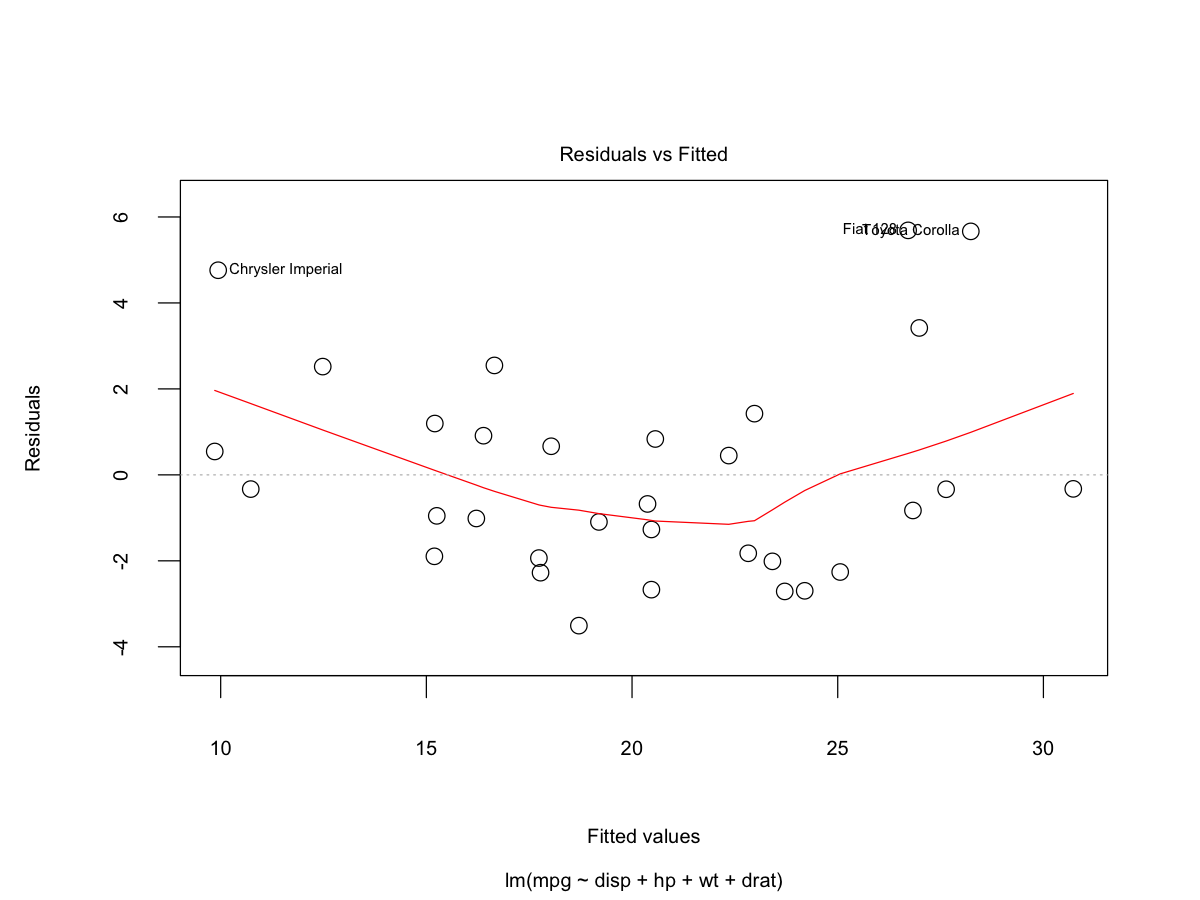

In [10]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
plot(model, which = 1)

> Notice the clear deviation from zero conditional mean, indicated by the parabolic shape.  This means that our coefficients will be biased. There are three different approaches to resolving this issue.

> 4.1 If we can plausibly claim (using out of sample information) that $cov(x, u) = 0$ (or more precisely that $E(x,u) = E(x)E(u) = 0$) which we cannot test for using our diagnostic plots,(recall we are already forcing $\sum_{i=1}^n x_i\hat{u}_i = 0$) then the bias of the estimator will converge in probability to zero as $n \rightarrow \infty$, i.e. the estimator is still consistent. If so then if we have a large sample size we may furthermore argue that this bias has already shrunk to the point where it is insignificant.

> 4.2 We can to use our background knowledge to identify an varaibles which are omitted from the regression, hidden in u, which may be correlated with our x's which cause this functional dependence between $X$ and $u$.  

> In this case, there are a couple arguments we could make.  For example, does the car have a setting for more efficient gear selection, or an exhuast system tuned for fuel efficiency, both of which may be more common with smaller engines. 

> When we can identify a potential omitted variable we can use our understanding of ommitted variable bias to determine whether the bias is positive or negative and if it moves the estimate closer or father away from zero.

> 4.3 it may be that the regression is misspecified and we need to include some non linear functions of regressors.*

> 5 Homoskedasticity: Our residuals versus fitted values plot doesn't seem to indicate heteroskedasticity - the band seems to have even thickness.  However, with this number of data points, it can be hard to tell.  The scale location plot gives us another way to assess this assumption:*

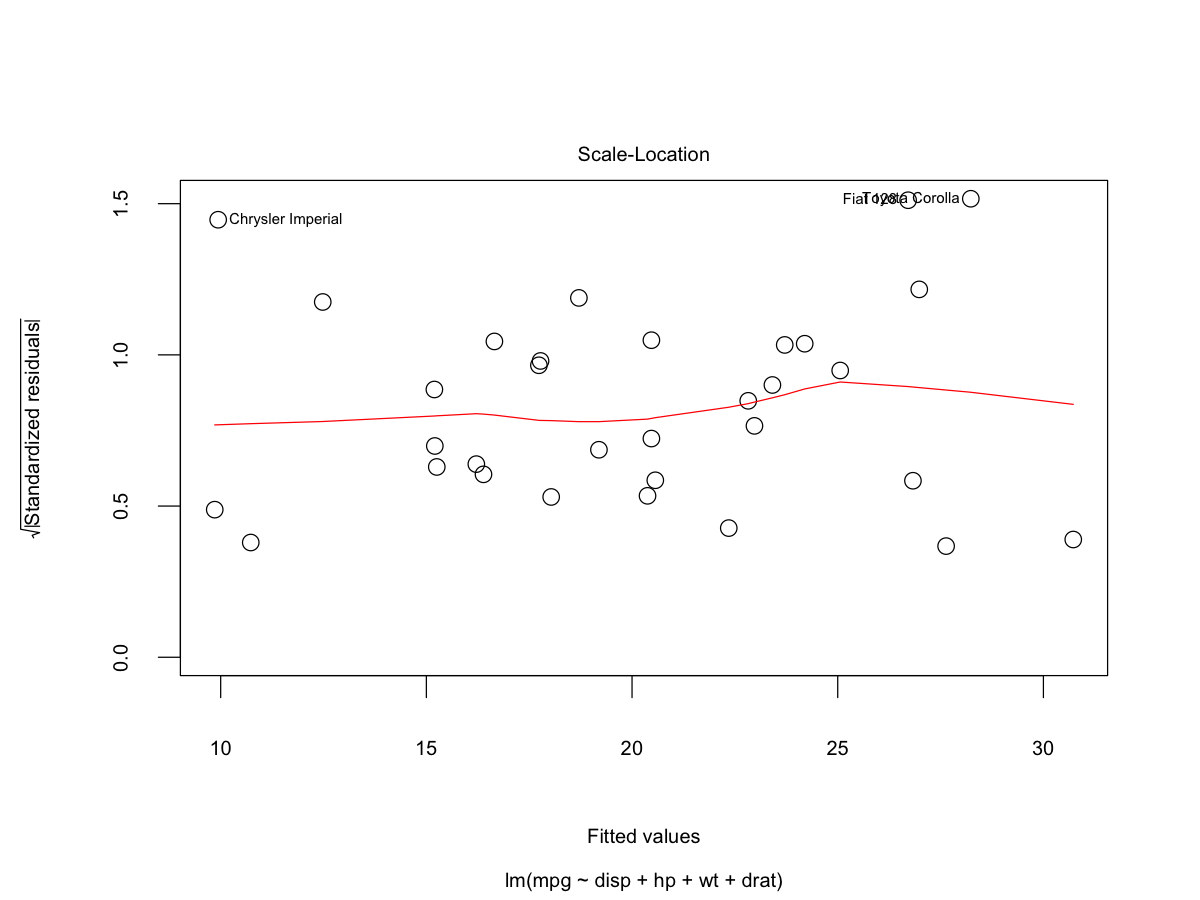

In [11]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
plot(model, which = 3)

> The flat red line also suggests homoskedasticity.  Despite this evidence, we will proceed with robust standard errors, because that's good conservative practice.


> 6 Normality of Errors: To check normality of errors, we can look at the qqplot that's part of R's standard diagnostics

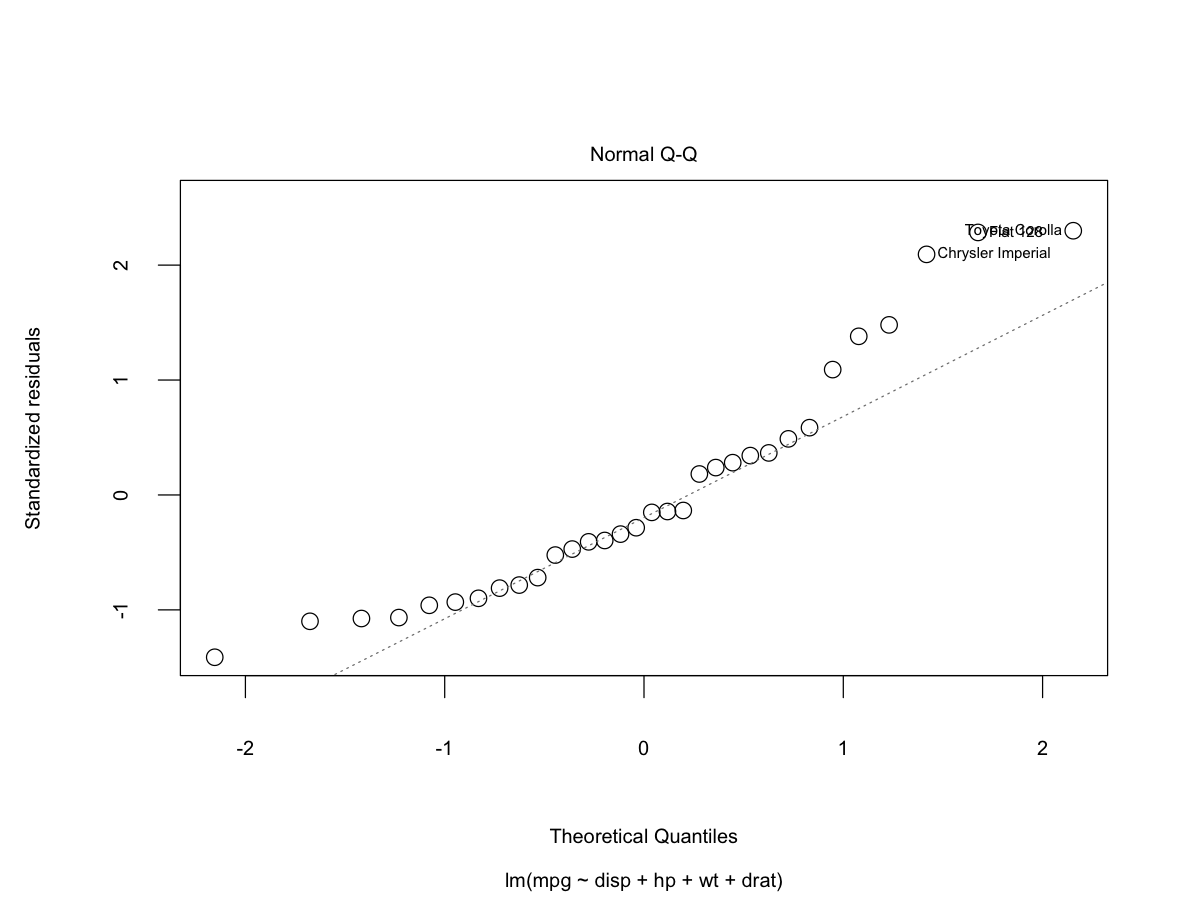

In [12]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
plot(model, which = 2)

> We can also visually look at the residuals directly

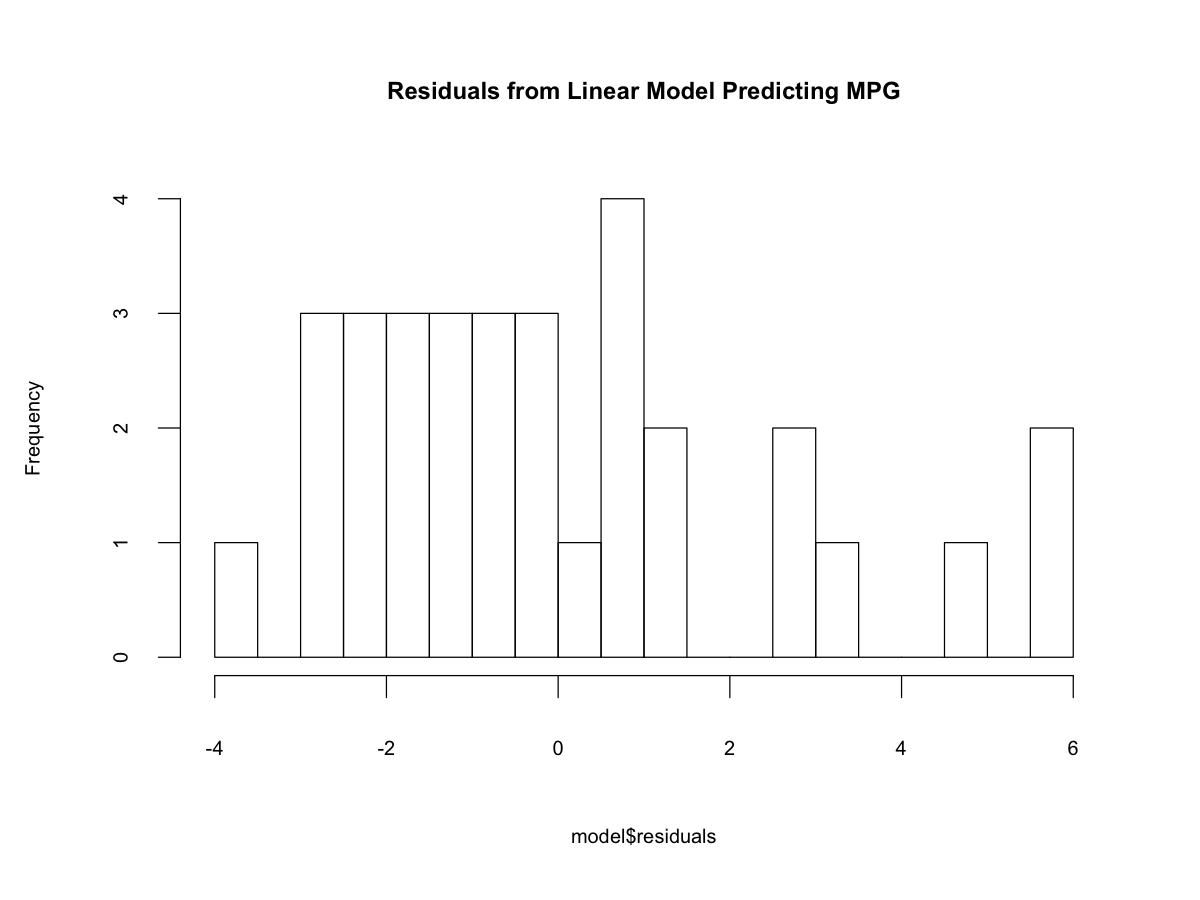

In [13]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
hist(model$residuals, breaks = 20, main = "Residuals from Linear Model Predicting MPG")

> Both methods suggest we have a rightward skew.  However, we have a large sample size, so the CLT tells us that our estimators will have a normal sampling distribution.  Our look at the histogram confirms that we aren't in a situation with an extreme skew, so n=30 should be sufficient for the CLT.

** 3.3 ** In addition to the above, assess to what extent (imperfect) multicollinearity is affecting your inference.

In [14]:
vif(model)
vif(model) > 4

disp       hp       wt     drat 
8.209402 2.894373 5.096601 2.279547

disp    hp    wt  drat 
 TRUE FALSE  TRUE FALSE

> We note that displacement and weight are both closely predicted from the other variables.  However, we would not take any automatic action here.  Instead, we keep this in mind when we interpret our coefficients, and if these variables are insignificant, we may then consider changing our model.

** 3.4 ** Interpret your slope coefficients, and note which ones are significantly different from zero.  Whether or not you detected heteroskedasticity above, be conservative in this step and use robust standard errors.

In [15]:
coeftest(model, vcov = vcovHC)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 29.1487376  7.0402909  4.1403 0.0003051 ***
disp         0.0038152  0.0109347  0.3489 0.7298630    
hp          -0.0347835  0.0167887 -2.0718 0.0479579 *  
wt          -3.4796675  1.2644920 -2.7518 0.0104582 *  
drat         1.7680488  1.2465829  1.4183 0.1675383    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


> We notice that only hp and wt are statistically significant. In particular, every increase of 1 horsepower is associated with 0.034 less miles per gallon, holding weight, displacement, rear axle ratio, and unobserved factors constant.  From another perspective, it would take $1 / 0.034 = 29$ more horsepower to result in an efficiency reduction of 1 mpg.

> Each 1000 lb increase in weight is associated with 3.47 less miles per gallon, holding other variables constant.  This seems like a lot, but notice that most cars only weigh a few thousand pounds total

In [16]:
summary(mtcars$wt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.513   2.581   3.325   3.217   3.610   5.424 

**3.5** How does the log transform affect which CLM assumptions hold.

> Applying a log transformation to the regressand fundamentally changes the assumed relationship between the regressand and the ther regressors since, the marginal effects are now expressed in percentages.

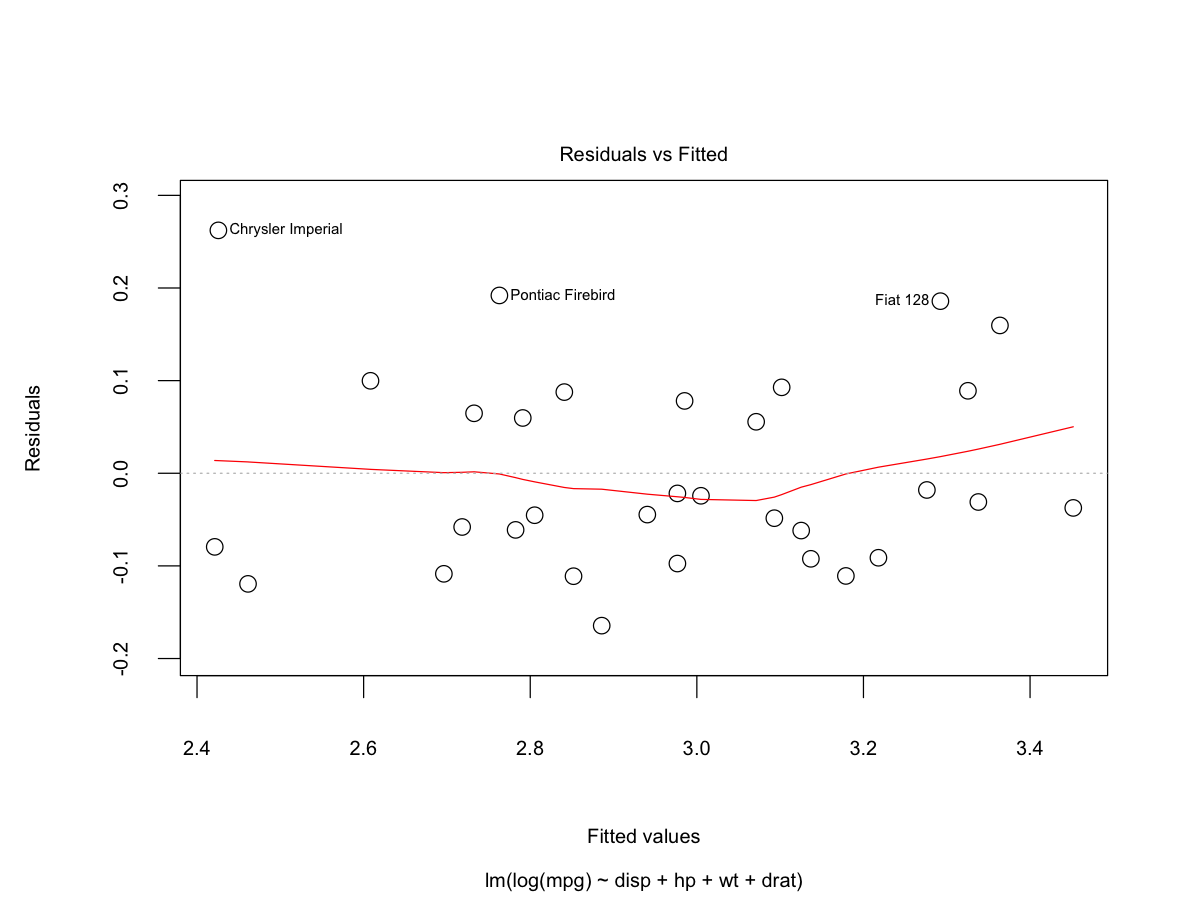

In [17]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
model2 <- lm(log(mpg)~disp+hp+wt+drat, data=mtcars) 
plot(model2, which=1)

> In the residuals vs. fitted plot the transformation seems to have reduced the dependence of the residulas on the fitted values, a good sign.

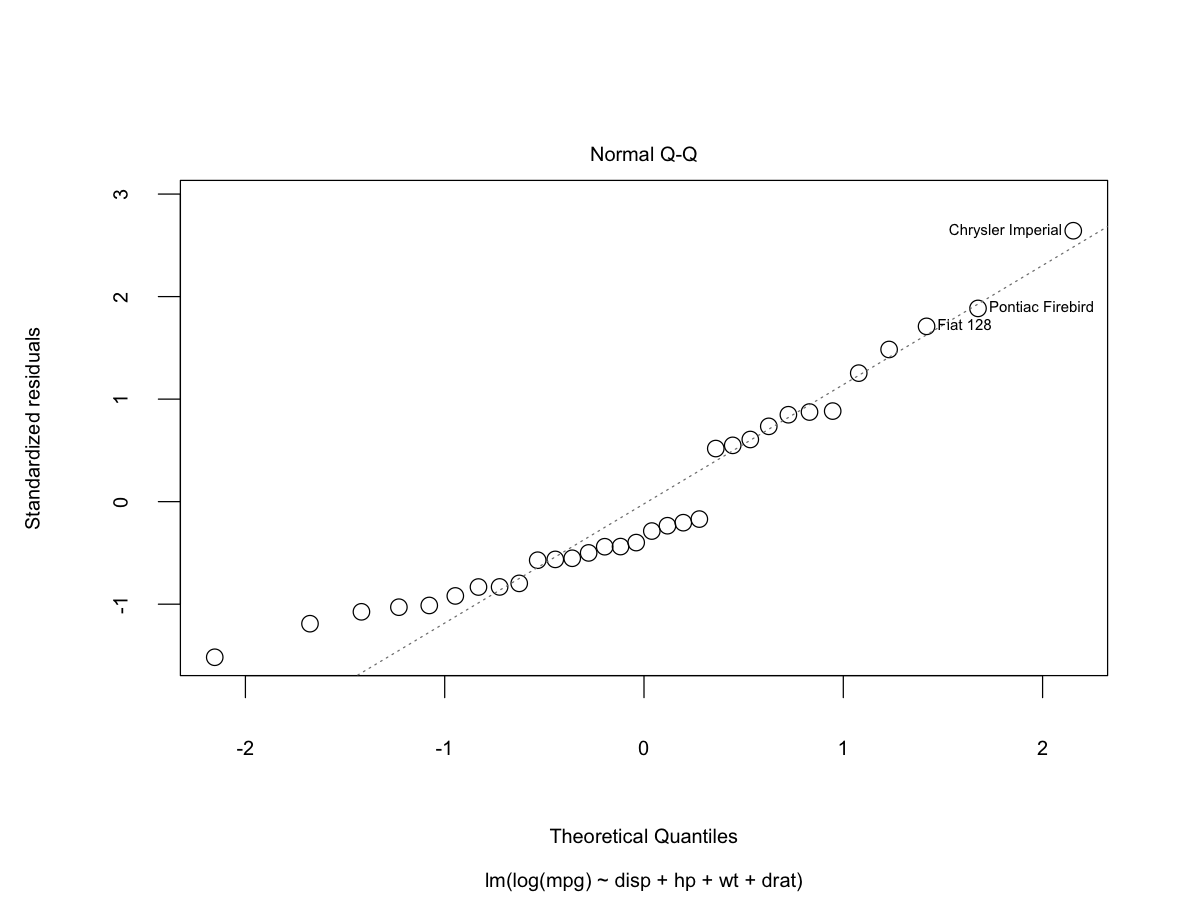

In [19]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
plot(model2, which=2)

> In the QQ plot we have a bit more difficulty claiming that u has a normal distribution at least in the lower quantiles

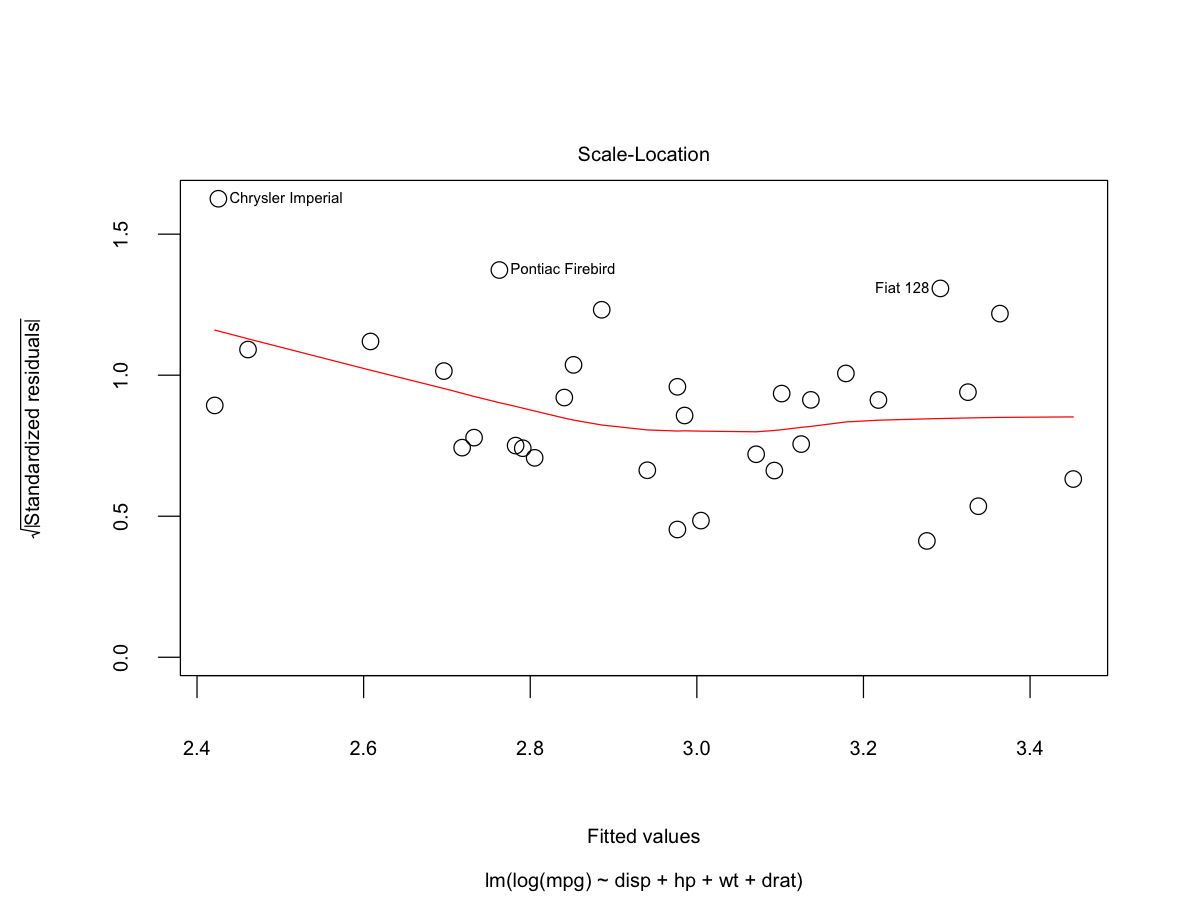

In [20]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
plot(model2, which=3)

> In the scale location plot, we can see that we have induced some heteroskedasticity where before there was little to none.

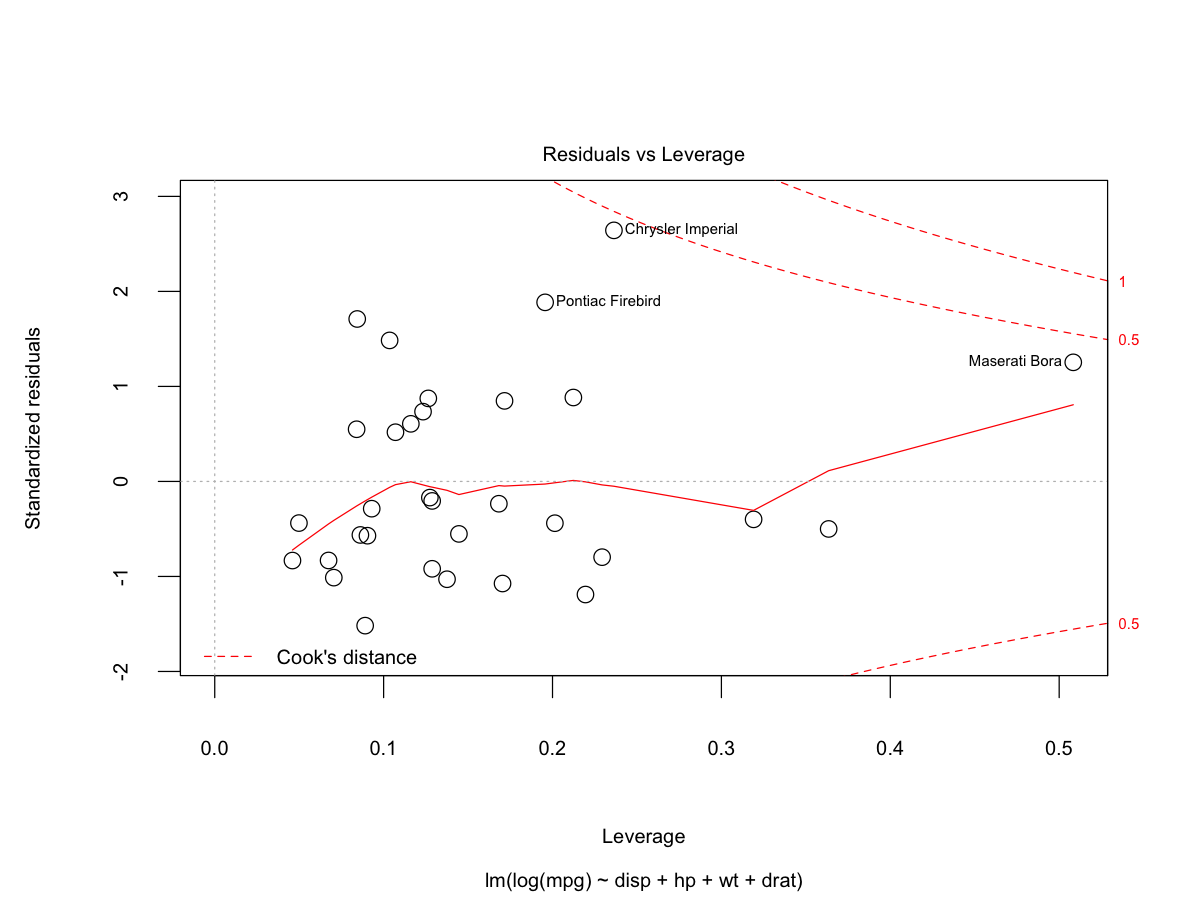

In [21]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
plot(model2, which=5)

> In the residuals vs leverage plot our transformation has generated some points with higher influence, but nothing to worry about

** 3.6 ** Which model has a better fit.

In [23]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
paste('Level-level Model Adjusted R Squared: ', summary(model)$adj.r.squared)
paste('Log-level Model Adjusted R Squared: ', summary(model2)$adj.r.squared)

[1] "Level-level Model Adjusted R Squared:  0.813573876849113"

[1] "Log-level Model Adjusted R Squared:  0.854572682124165"

> Model 2 has only a slightly higher R squared than the first model

** 3.7 ** (As time allows) Report the results of both models in a nicely formatted regression table.

In [24]:
(se.model = sqrt(diag(vcovHC(model))))

(se.model2 = sqrt(diag(vcovHC(model2))))

(Intercept)        disp          hp          wt        drat 
 7.04029088  0.01093473  0.01678874  1.26449201  1.24658290

(Intercept)         disp           hp           wt         drat 
0.3332747108 0.0005584834 0.0007220347 0.0621694818 0.0558803100

In [26]:
# We pass the standard errors into stargazer through 
# the se argument.
stargazer(model, model2, type = "text", omit.stat = "f",
          se = list(se.model, se.model2),
          star.cutoffs = c(0.05, 0.01, 0.001))


                                   Dependent variable:      
                              ------------------------------
                                    mpg          log(mpg)   
                                    (1)            (2)      
------------------------------------------------------------
disp                               0.004         -0.0001    
                                  (0.011)        (0.001)    
                                                            
hp                                -0.035*        -0.001*    
                                  (0.017)        (0.001)    
                                                            
wt                               -3.480**        -0.172**   
                                  (1.264)        (0.062)    
                                                            
drat                               1.768          0.045     
                                  (1.247)        (0.056)    
                       

#### 4.0 More about Multicollinearity

A common problem with multivariate regression is collinearity.
If two or more predictor variables are highly correlated, and they are both entered into a regression model, it increases the standard error of each one and you get very unstable estimates of the slope. We usually assess the collinearity by variance inflation factor (VIF). 

#### 4.1 Ways to Detect Multicollinearity 

We begin by regressing a particular independent variable on all other independent variables.

1. As the squared correlation (r2) increases toward 1.0, the magnitude of potential problems associated with multicollinearity increases correspondingly. 

2. Tolerance (1-R2) One minus the squared multiple correlation of a given IV from other Ivs in the equation. Tolerance values of 0.10 or less Indicate that there may be serious multicollinearity. 

3. The Variance Inflation Factor [VIF=1/(1-R2)] VIF Is the reciprocal of the Tolerance. Any VIF of 10 or more provides evidence of serious multicollinearity. 

4. Condition Number (k) The square root of the ratio of the largest eigenvalue to the smallest eigenvalue. k of 30 or larger indicate that there may be serious multicollinearity.